In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:

df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\15. Clustering\\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop('CustomerID',axis = 1,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.shape

(200, 4)

df.isnull().sum()

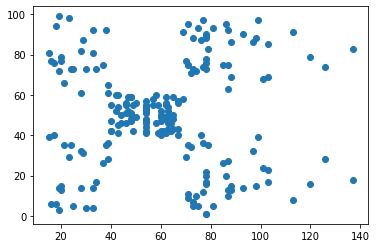

In [6]:
a = df.iloc[:,2]
b = df.iloc[:,3]
plt.scatter(a,b)
plt.show()

# modeling

In [7]:
X = df.iloc[:, [2,3]].values

In [8]:
from sklearn.cluster import KMeans

In [9]:
WCSS = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [10]:
WCSS

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21862.092672182887,
 19672.07284901432]

# elbow curve

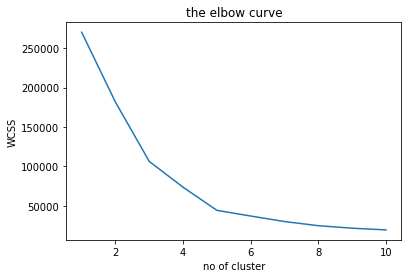

In [11]:
plt.plot(range(1,11),WCSS)
plt.title('the elbow curve')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

## rebult the model 

In [12]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', random_state = 42)


# predict

In [13]:
k_pred = kmeans.fit_predict(X)

In [14]:
k_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# visualization of scatterplot

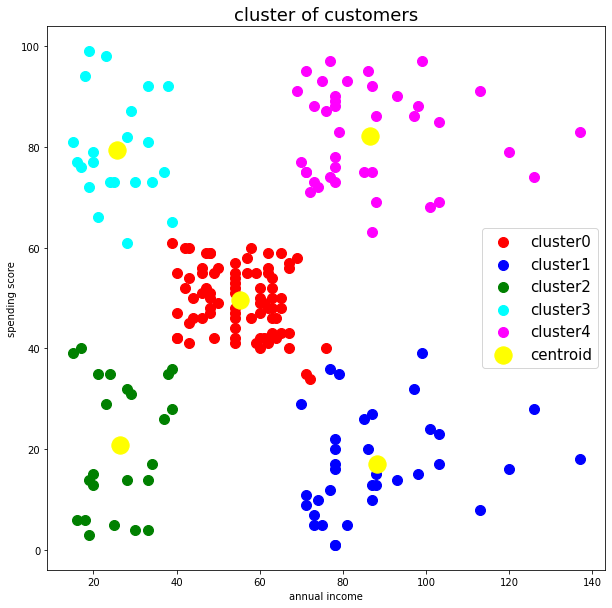

In [15]:
# plt.savefig('subplot.jpg')

plt.figure(1,figsize=(10,10))

plt.scatter(X[k_pred==0,0], X[k_pred ==0,1],s = 100 ,c = 'red', label = 'cluster0')

plt.scatter(X[k_pred==1,0], X[k_pred ==1,1],s = 100 ,c = 'blue', label = 'cluster1')

plt.scatter(X[k_pred==2,0], X[k_pred ==2,1],s = 100 ,c = 'green', label = 'cluster2')

plt.scatter(X[k_pred==3,0], X[k_pred ==3,1],s = 100 ,c = 'cyan', label = 'cluster3')

plt.scatter(X[k_pred==4,0], X[k_pred ==4,1],s = 100 ,c = 'magenta', label = 'cluster4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300 ,c = 'yellow', label = 'centroid')

plt.rcParams.update({'font.size': 15})

plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [16]:
df['cluster'] = pd.DataFrame(k_pred)

In [17]:
df.cluster.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

In [18]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,4
196,Female,45,126,28,1
197,Male,32,126,74,4
198,Male,32,137,18,1


In [19]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]
cluster4 = df[df['cluster']==4]

In [20]:
cluster0

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
43,Female,31,39,61,0
46,Female,50,40,55,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
...,...,...,...,...,...
121,Female,38,67,40,0
122,Female,40,69,58,0
126,Male,43,71,35,0
132,Female,25,72,34,0


In [21]:
c=pd.crosstab(df.Genre,df.cluster,margins = True)
c

cluster,0,1,2,3,4,All
Genre,,,,,,
Female,48,16,14,13,21,112
Male,33,19,9,9,18,88
All,81,35,23,22,39,200


<AxesSubplot:xlabel='Genre'>

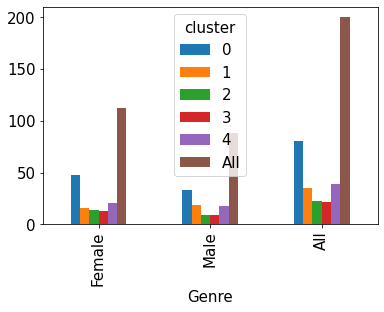

In [22]:
c.plot(kind='bar',stacked=False)

In [23]:
pd.crosstab(df.Age,df.cluster,margins = True)

cluster,0,1,2,3,4,All
Age,,,,,,
18,3,0,0,1,0,4
19,5,2,1,0,0,8
20,1,1,1,2,0,5
21,2,0,0,3,0,5
22,1,0,0,2,0,3
23,2,1,0,3,0,6
24,1,0,0,3,0,4
25,1,1,0,1,0,3
26,2,0,0,0,0,2


In [24]:
pd.crosstab(df['Annual Income (k$)'],df.cluster,margins = True)

cluster,0,1,2,3,4,All
Annual Income (k$),,,,,,
15,0,0,1,1,0,2
16,0,0,1,1,0,2
17,0,0,1,1,0,2
18,0,0,1,1,0,2
19,0,0,2,2,0,4
...,...,...,...,...,...,...
113,0,1,0,0,1,2
120,0,1,0,0,1,2
126,0,1,0,0,1,2


In [25]:
g=df.groupby('cluster').mean()
g

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


<AxesSubplot:xlabel='cluster'>

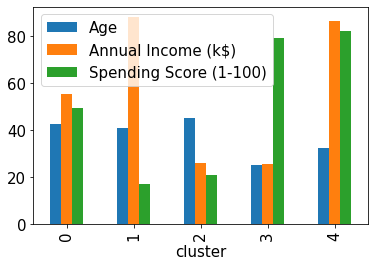

In [26]:
g.plot(kind='bar',stacked=False)

# TO save cluser wise data

In [27]:
cluster1.to_csv('cluster1.csv')